# Comparing LeBron James vs Kobe Bryant vs Michael Jordan

We have decided to gather the data of each players career stats to help us determine who was the best shooter in the great debate of who is the greatest of all time aka the G.O.A.T
- Firstly we are comparing the amount of points scored throughout their career.
- Secondly we are then comparing the accuracy of each players shooting based on their percentage of 3 pointers, free throws and field goals.

In [27]:
#import dependencies
from nba_api.stats import endpoints
from nba_api.stats.endpoints import playercareerstats
import json
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
# Dependencies for the plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
#Defining the dictionary and import players for player id specifications
#print to see what data we have imported and the information that it holds
from nba_api.stats.static import players
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))
nba_players[:5]

Number of players fetched: 4501


[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False}]

In [3]:
#Search for a specific player
lebron = [player for player in  nba_players
          if player['full_name'] == 'LeBron James'][0]
lebron
#Lebron ID = 2544

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [4]:
#Creating a data frame for Lebron James' careerstats
from nba_api.stats.endpoints import playercareerstats
career = playercareerstats.PlayerCareerStats(player_id='2544')
lebron_data = career.get_data_frames()[0]
lebron_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


In [5]:
#EXtracting the the columns needed for cleaner data frame
lebron_scoring_df = lebron_data[["SEASON_ID", "TEAM_ABBREVIATION", "PLAYER_AGE", "PTS" ]]
lebron_scoring_df

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,PTS
0,2003-04,CLE,19.0,1654
1,2004-05,CLE,20.0,2175
2,2005-06,CLE,21.0,2478
3,2006-07,CLE,22.0,2132
4,2007-08,CLE,23.0,2250
5,2008-09,CLE,24.0,2304
6,2009-10,CLE,25.0,2258
7,2010-11,MIA,26.0,2111
8,2011-12,MIA,27.0,1683
9,2012-13,MIA,28.0,2036


In [6]:
#Describe functions gives a quick overview of statiscal summary.
lebron_scoring_df.describe()

,PLAYER_AGE,PTS
count,18.000000,18.000000
mean,27.500000,1960.166667
std,5.338539,351.697940
min,19.000000,1042.000000
25%,23.250000,1709.250000
50%,27.500000,2062.500000
75%,31.750000,2231.250000
max,36.000000,2478.000000


In [29]:
fig = px.scatter(
    lebron_data, x='PLAYER_AGE', y='PTS', size='PTS', size_max=8, color_continuous_scale='rdylbu_r',
    color='PTS', title="Visualising LeBron's Career",hover_name ='SEASON_ID',
    labels={ # replaces default labels by column name
                     'PLAYER_AGE': "Player Age",  'PTS': "Total Points"})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(width=700, height=500)
fig.show()

In [8]:
#Repeat the steps to above to find data frame and stats on Kobe Bryant
kobe = [player for player in  nba_players
          if player['full_name'] == 'Kobe Bryant'][0]
kobe

{'id': 977,
 'full_name': 'Kobe Bryant',
 'first_name': 'Kobe',
 'last_name': 'Bryant',
 'is_active': False}

In [9]:
kobe_career = playercareerstats.PlayerCareerStats(player_id='977')
kobe_data = kobe_career.get_data_frames()[0]
kobe_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,977,1996-97,00,1610612747,LAL,18.0,71,6,1102.0,176,...,0.819,47,85,132,91,49,23,112,102,539
1,977,1997-98,00,1610612747,LAL,19.0,79,1,2056.0,391,...,0.794,79,163,242,199,74,40,157,180,1220
2,977,1998-99,00,1610612747,LAL,20.0,50,50,1896.0,362,...,0.839,53,211,264,190,72,50,157,153,996
3,977,1999-00,00,1610612747,LAL,21.0,66,62,2524.0,554,...,0.821,108,308,416,323,106,62,182,220,1485
4,977,2000-01,00,1610612747,LAL,22.0,68,68,2791.0,701,...,0.853,104,295,399,338,114,43,220,222,1938
5,977,2001-02,00,1610612747,LAL,23.0,80,80,3065.0,749,...,0.829,112,329,441,438,118,35,223,228,2019
6,977,2002-03,00,1610612747,LAL,24.0,82,82,3404.0,868,...,0.843,106,458,564,481,181,67,288,218,2461
7,977,2003-04,00,1610612747,LAL,25.0,65,64,2452.0,516,...,0.852,103,256,359,330,112,28,171,176,1557
8,977,2004-05,00,1610612747,LAL,26.0,66,66,2689.0,573,...,0.816,95,297,392,398,86,53,270,174,1819
9,977,2005-06,00,1610612747,LAL,27.0,80,80,3277.0,978,...,0.850,71,354,425,360,147,30,250,233,2832


In [10]:
kobe_scoring_df = kobe_data[["SEASON_ID", "TEAM_ABBREVIATION", "PLAYER_AGE", "PTS" ]]
kobe_scoring_df

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,PTS
0,1996-97,LAL,18.0,539
1,1997-98,LAL,19.0,1220
2,1998-99,LAL,20.0,996
3,1999-00,LAL,21.0,1485
4,2000-01,LAL,22.0,1938
5,2001-02,LAL,23.0,2019
6,2002-03,LAL,24.0,2461
7,2003-04,LAL,25.0,1557
8,2004-05,LAL,26.0,1819
9,2005-06,LAL,27.0,2832


In [11]:
kobe_scoring_df.describe()

,PLAYER_AGE,PTS
count,20.00000,20.000000
mean,27.50000,1682.150000
std,5.91608,707.019041
min,18.00000,83.000000
25%,22.75000,1205.250000
50%,27.50000,1878.500000
75%,32.25000,2150.000000
max,37.00000,2832.000000


In [30]:
fig = px.scatter(
    kobe_data, x='PLAYER_AGE', y='PTS', size='PTS', size_max=8, color_continuous_scale='rdylbu_r',
    color='PTS', title="Visualising Kobe's Career",hover_name ='SEASON_ID',
    labels={ # replaces default labels by column name
                     'PLAYER_AGE': "Player Age",  'PTS': "Total Points"})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(width=700, height=500)
fig.show()

In [13]:
#Repeat the steps to above to find data frame and stats on Michael Jordan
jordan = [player for player in  nba_players
          if player['full_name'] == 'Michael Jordan'][0]
jordan

{'id': 893,
 'full_name': 'Michael Jordan',
 'first_name': 'Michael',
 'last_name': 'Jordan',
 'is_active': False}

In [14]:
jordan_career = playercareerstats.PlayerCareerStats(player_id='893')
jordan_data = jordan_career.get_data_frames()[0]
jordan_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,3144.0,837,...,0.845,167,367,534,481,196,69,291,285,2313
1,893,1985-86,00,1610612741,CHI,23.0,18,7,451.0,150,...,0.840,23,41,64,53,37,21,45,46,408
2,893,1986-87,00,1610612741,CHI,24.0,82,82,3281.0,1098,...,0.857,166,264,430,377,236,125,272,237,3041
3,893,1987-88,00,1610612741,CHI,25.0,82,82,3311.0,1069,...,0.841,139,310,449,485,259,131,252,270,2868
4,893,1988-89,00,1610612741,CHI,26.0,81,81,3255.0,966,...,0.850,149,503,652,650,234,65,290,247,2633
5,893,1989-90,00,1610612741,CHI,27.0,82,82,3197.0,1034,...,0.848,143,422,565,519,227,54,247,241,2753
6,893,1990-91,00,1610612741,CHI,28.0,82,82,3034.0,990,...,0.851,118,374,492,453,223,83,202,229,2580
7,893,1991-92,00,1610612741,CHI,29.0,80,80,3102.0,943,...,0.832,91,420,511,489,182,75,200,201,2404
8,893,1992-93,00,1610612741,CHI,30.0,78,78,3067.0,992,...,0.837,135,387,522,428,221,61,207,188,2541
9,893,1994-95,00,1610612741,CHI,32.0,17,17,668.0,166,...,0.801,25,92,117,90,30,13,35,47,457


In [15]:
jordan_scoring_df = jordan_data[["SEASON_ID", "TEAM_ABBREVIATION", "PLAYER_AGE", "PTS" ]]
jordan_scoring_df

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,PTS
0,1984-85,CHI,22.0,2313
1,1985-86,CHI,23.0,408
2,1986-87,CHI,24.0,3041
3,1987-88,CHI,25.0,2868
4,1988-89,CHI,26.0,2633
5,1989-90,CHI,27.0,2753
6,1990-91,CHI,28.0,2580
7,1991-92,CHI,29.0,2404
8,1992-93,CHI,30.0,2541
9,1994-95,CHI,32.0,457


In [16]:
jordan_scoring_df.describe()

,PLAYER_AGE,PTS
count,15.000000,15.000000
mean,29.800000,2152.800000
std,5.595917,816.555501
min,22.000000,408.000000
25%,25.500000,1976.500000
50%,29.000000,2431.000000
75%,33.500000,2606.500000
max,40.000000,3041.000000


In [31]:
fig = px.scatter(
    jordan_data, x='PLAYER_AGE', y='PTS', size='PTS', size_max=8, color_continuous_scale='rdylbu_r',
    color='PTS', title="Visualising Michael's Career",hover_name ='SEASON_ID',
    labels={ # replaces default labels by column name
                     'PLAYER_AGE': "Player Age",  'PTS': "Total Points"})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(width=700, height=500)
fig.show()

In [32]:
# Showing the players age vs total points showed at that age in a line graph.
# dict for the dataframes and their names
dfs = {"Lebron James" : lebron_data, "Kobe Bryant": kobe_data, "Michael Jordan" : jordan_data}
# plot the data
fig = go.Figure()
for i in dfs:
    fig = fig.add_trace(go.Scatter(x = dfs[i]["PLAYER_AGE"],
                                   y = dfs[i]["PTS"],
                                   name = i))
fig.show()

In [18]:
#Comparing total points scored over the career of each player
total_lbj = lebron_scoring_df["PTS"].sum()
total_kobe = kobe_scoring_df["PTS"].sum()
total_mj = jordan_scoring_df["PTS"].sum()
print(f"LeBron's Total Points Scored: {total_lbj}")
print(f"Kobe's Total Points Scored: {total_kobe}")
print(f"Michael's Total Points Scored: {total_mj}")

LeBron's Total Points Scored: 35283
Kobe's Total Points Scored: 33643
Michael's Total Points Scored: 32292


In [19]:
#Grabbing the columns names to see what the data frame contains
jordan_data.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

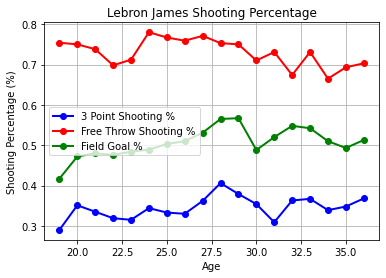

In [20]:
#Three point %, Free throw %, Field goal%
#graph showing all percentages for each players
#lebron_data.plot(kind='line', x="PLAYER_AGE", y='FG3_PCT')
lebron_3pt = lebron_data['FG3_PCT']
lebron_free = lebron_data['FT_PCT']
lebron_field = lebron_data['FG_PCT']
lebron_age = lebron_data['PLAYER_AGE']
plt.plot(lebron_age, lebron_3pt, marker='o', color='blue', linewidth=2, label="3 Point Shooting %")
plt.plot(lebron_age, lebron_free, marker='o', color='red', linewidth=2, label="Free Throw Shooting %")
plt.plot(lebron_age, lebron_field, marker='o', color='green', linewidth=2, label="Field Goal %" )
plt.grid()
plt.xlabel("Age")
plt.ylabel("Shooting Percentage (%)")
plt.title("Lebron James Shooting Percentage")
plt.legend()

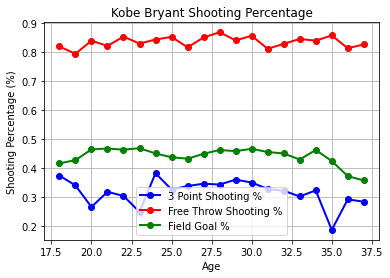

In [21]:
kobe_3pt = kobe_data['FG3_PCT']
kobe_free = kobe_data['FT_PCT']
kobe_field = kobe_data['FG_PCT']
kobe_age = kobe_data['PLAYER_AGE']
plt.plot(kobe_age, kobe_3pt, marker='o', color='blue', linewidth=2, label="3 Point Shooting %")
plt.plot(kobe_age, kobe_free, marker='o', color='red', linewidth=2, label="Free Throw Shooting %")
plt.plot(kobe_age, kobe_field, marker='o', color='green', linewidth=2, label="Field Goal %")
plt.grid()
plt.xlabel("Age")
plt.ylabel("Shooting Percentage (%)")
plt.title("Kobe Bryant Shooting Percentage")
plt.legend()

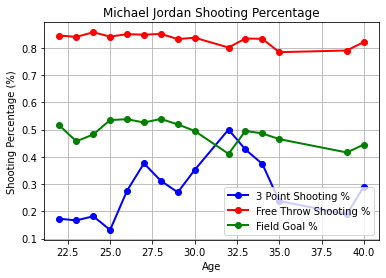

In [22]:
jordan_3pt = jordan_data['FG3_PCT']
jordan_free = jordan_data['FT_PCT']
jordan_field = jordan_data['FG_PCT']
jordan_age = jordan_data['PLAYER_AGE']
plt.plot(jordan_age, jordan_3pt, marker='o', color='blue', linewidth=2, label="3 Point Shooting %")
plt.plot(jordan_age, jordan_free, marker='o', color='red', linewidth=2, label="Free Throw Shooting %")
plt.plot(jordan_age, jordan_field, marker='o', color='green', linewidth=2, label="Field Goal %")
plt.grid()
plt.xlabel("Age")
plt.ylabel("Shooting Percentage (%)")
plt.title("Michael Jordan Shooting Percentage")
plt.legend()

# Conclusion/Findings
### to be finialised with group.
- The best shooter based solely in points scored will be Lebron James with a total of 35283 points scored thus far. However with this said we have to take into consideration that each player has played a different amount of seasons and that LeBron James is still an active player so his total amount of points scored will continue to increase. If we take other summary statistics into account such as the mean(average) and maximum amount of points scored we can see that Michael Jordan has the highest mean (2152) and also the maximum amount of point scored in a season (3041).
- The best shooter based on the sum of their field, three point and free throw percentages will be Kobe Bryant

In [26]:
# #scatter of cle_teamyear_df_cleaned
# fig = px.scatter(
#     cle_teamyear_df_cleaned, x='WIN_PCT', y='FG_PCT', size='PTS', size_max=13, color_continuous_scale='rdylbu_r',
#     color='PTS', title="Visualising correlations between accuracy & wins",hover_name ='TEAM_ID', trendline="ols",
#     labels={ # replaces default labels by column name
#                      'WIN_PCT': "Win Perentage",  'FG_PCT': "Field Goals Percentage by Team"})
# fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.update_layout(width=800, height=600)
# fig.data[1].marker.color = 'grey'  # set trendline color
# fig.show()